# Prerequisites

In [37]:
# Importing the necessary libraries
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Data Importation

In [5]:
# Loading the dataset 'MBA.csv' to the notebook
dataset = pd.read_csv("C://Users/Hareen/Desktop/5302/MBA.csv")
df = dataset # copying the original dataset into a duplicate dataset so that the oroginal one remains untouched
df.head() # viewing the first 5 rows of the dataset

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680,5,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710,5,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690,6,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590,5,Consulting,NaN


# Descriptive Analysis

In [8]:
# An overview about the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   int64  
 7   work_exp        6194 non-null   int64  
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 441.7+ KB


In [10]:
# Describe data (Only describes the quantitative variables)
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [12]:
# Checking the amount of null values for each column
for column in df.columns:
    print(column + " " + str(df[column].isnull().sum()))

application_id 0
gender 0
international 0
gpa 0
major 0
race 1842
gmat 0
work_exp 0
work_industry 0
admission 5194


In [14]:
# We remove the missing entries in the 'admission' column
df.dropna(subset=['admission'], inplace=True)

df.drop('application_id', axis=1, inplace=True)  # Use axis=1 for dropping columns

In [16]:
df.describe()

,gpa,gmat,work_exp
count,1000.000000,1000.000000,1000.000000
mean,3.350730,690.820000,5.033000
std,0.127772,40.841102,1.005446
min,2.890000,570.000000,1.000000
25%,3.270000,670.000000,4.000000
50%,3.350000,690.000000,5.000000
75%,3.430000,720.000000,6.000000
max,3.740000,780.000000,8.000000


In [18]:
# Checking the amount of null values for each column again to see if our dropna() worked
for column in df.columns:
    print(column + " " + str(df[column].isnull().sum()))

gender 0
international 0
gpa 0
major 0
race 308
gmat 0
work_exp 0
work_industry 0
admission 0


In [20]:
# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=3)  # You can adjust the number of neighbors

# Fit and transform the DataFrame
df['race_encoded'] = df['race'].astype('category').cat.codes  # Encoding categorical 'race' column

# Impute missing values
imputed_values = imputer.fit_transform(df[['race_encoded']])

# Update the DataFrame with imputed values
df['race_encoded'] = imputed_values[:, 0]

# Decode the 'race' column back to original categories
df['race'] = df['race_encoded'].astype('category').cat.categories[df['race_encoded'].astype(int)]

# Drop the encoded column if no longer needed
df.drop(columns=['race_encoded'], inplace=True)

print(df)

      gender  international   gpa       major  race  gmat  work_exp  \
0     Female          False  3.30    Business  -1.0   620         3   
2     Female           True  3.30    Business   4.0   710         5   
6     Female          False  2.93        STEM   2.0   590         3   
12    Female          False  3.24  Humanities   1.0   640         6   
14    Female          False  3.03        STEM   3.0   600         5   
...      ...            ...   ...         ...   ...   ...       ...   
6152  Female          False  3.31    Business   0.0   690         3   
6168  Female          False  3.21        STEM   3.0   680         5   
6175  Female          False  3.38  Humanities   1.0   680         3   
6177    Male          False  3.35  Humanities   1.0   750         5   
6191  Female           True  3.22    Business   4.0   680         5   

           work_industry admission  
0     Financial Services     Admit  
2             Technology     Admit  
6             Technology     Admit  

In [22]:
# Checking the amount of null values for each column again to see if our imputation worked
for column in df.columns:
    print(column + " " + str(df[column].isnull().sum()))

gender 0
international 0
gpa 0
major 0
race 0
gmat 0
work_exp 0
work_industry 0
admission 0


# Exploratory Data Analysis

Text(0.5, 1.0, 'Count of work_exp')

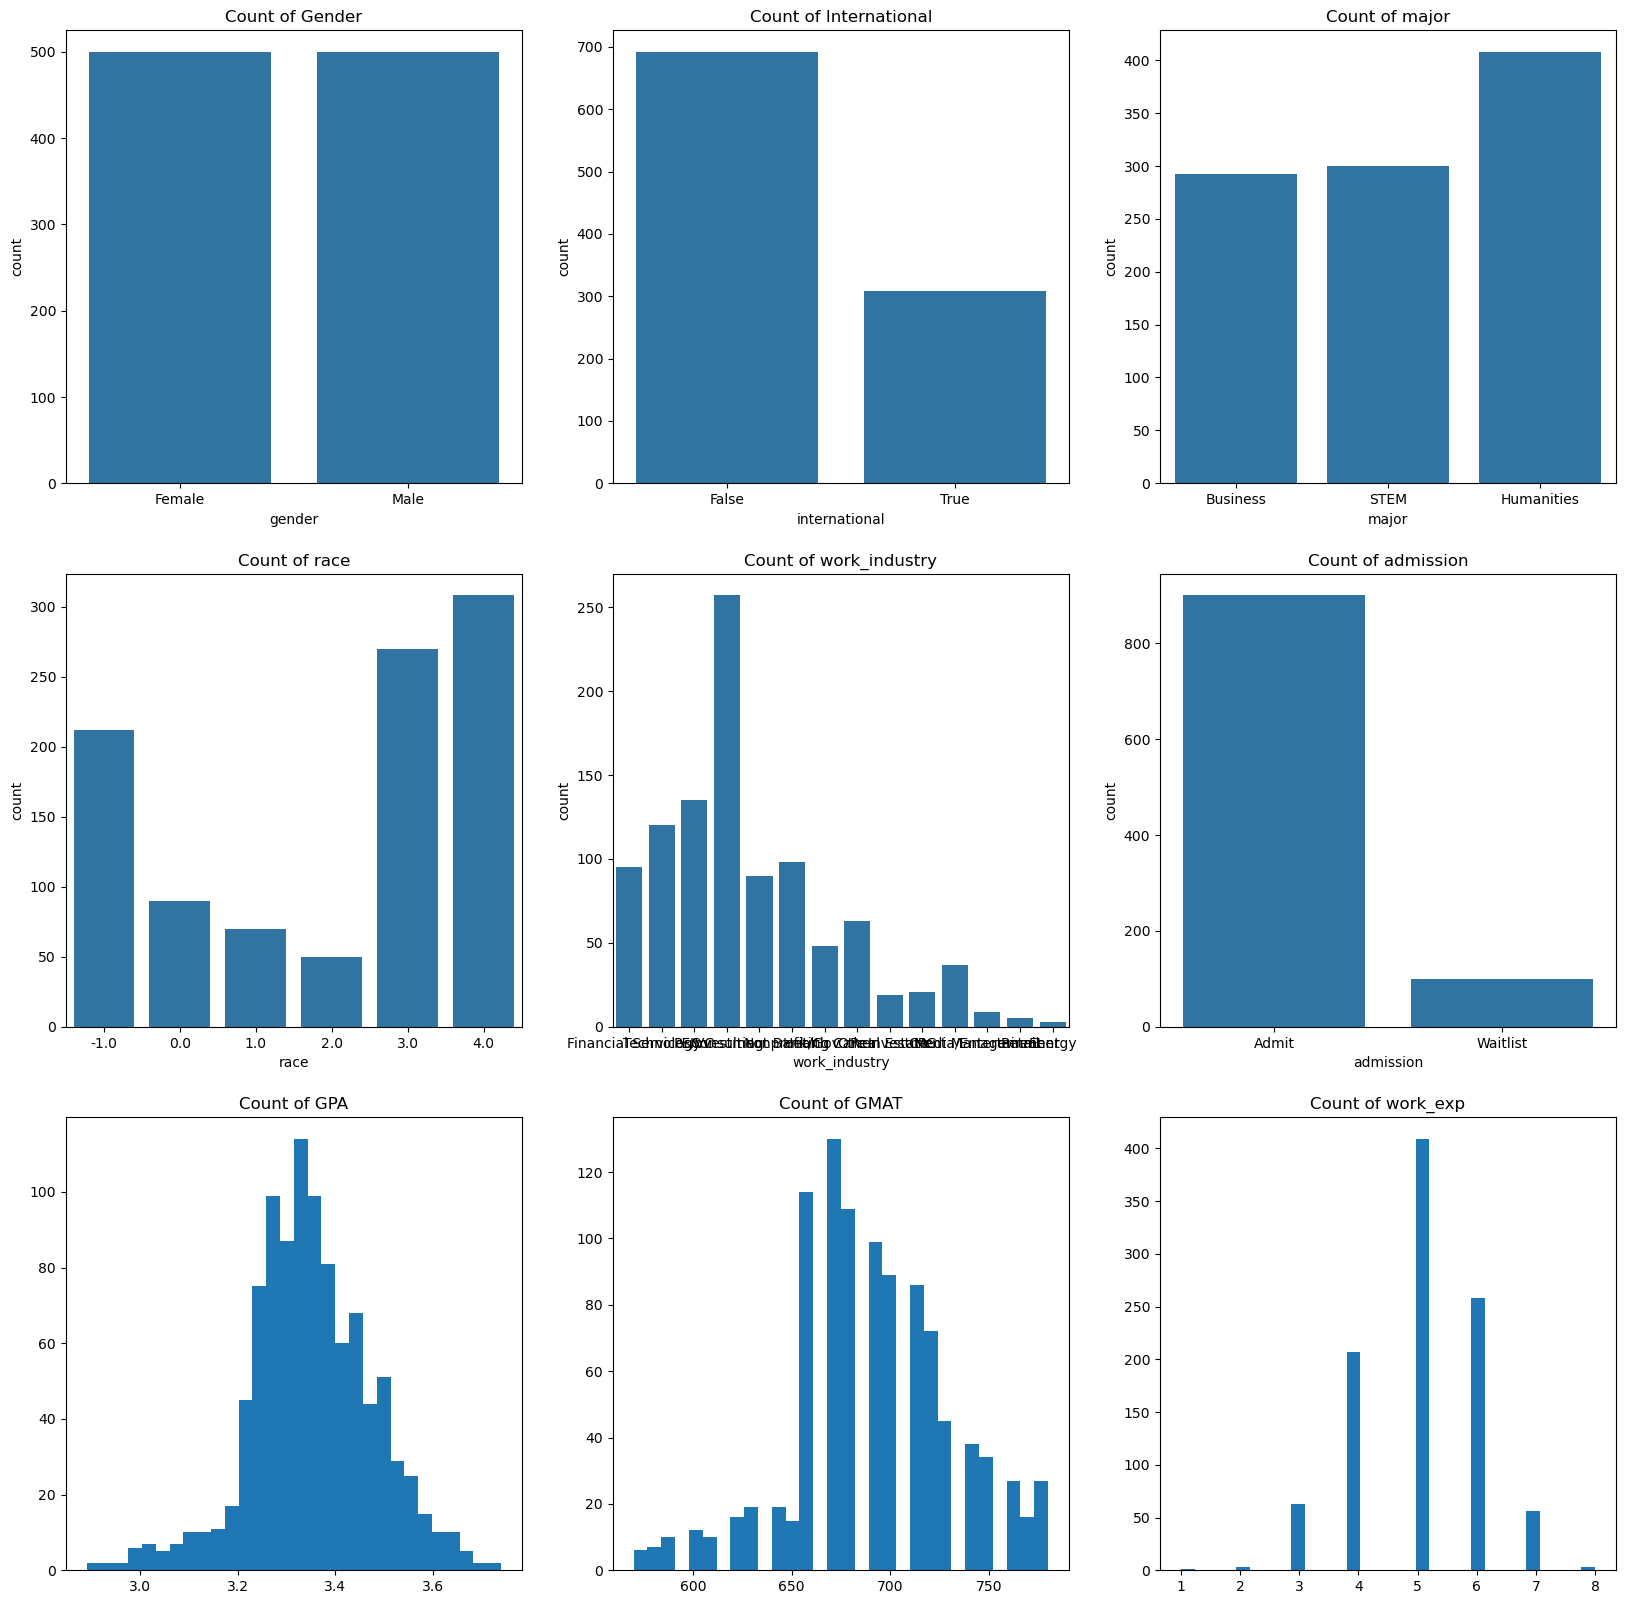

In [25]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 3, figsize=(20,20))  # Adjust figsize for better visibility

# For gender count plot
sns.countplot(x='gender', data=df, ax=axis[0,0])  # Use ax parameter to specify the subplot
axis[0,0].set_title("Count of Gender")

# For international count plot
sns.countplot(x='international', data=df, ax=axis[0,1])  # Use ax parameter to specify the subplot
axis[0,1].set_title("Count of International")

# For major count plot
sns.countplot(x='major', data=df, ax=axis[0,2])  # Use ax parameter to specify the subplot
axis[0,2].set_title("Count of major")

# For race count plot
sns.countplot(x='race', data=df, ax=axis[1,0])  # Use ax parameter to specify the subplot
axis[1,0].set_title("Count of race")

# For work_industry count plot
sns.countplot(x='work_industry', data=df, ax=axis[1,1])  # Use ax parameter to specify the subplot
axis[1,1].set_title("Count of work_industry")

# For admission count plot
sns.countplot(x='admission', data=df, ax=axis[1,2])  # Use ax parameter to specify the subplot
axis[1,2].set_title("Count of admission")

# For gpa count plot (using hist)
axis[2, 0].hist(df['gpa'], bins=30)  # Use ax parameter to specify the subplot
axis[2, 0].set_title("Count of GPA")

# For gmat count plot (using hist)
axis[2, 1].hist(df['gmat'], bins=30)  # Use ax parameter to specify the subplot
axis[2, 1].set_title("Count of GMAT")

# For work_exp count plot (using hist)
axis[2, 2].hist(df['work_exp'], bins=30)  # Use ax parameter to specify the subplot
axis[2, 2].set_title("Count of work_exp")

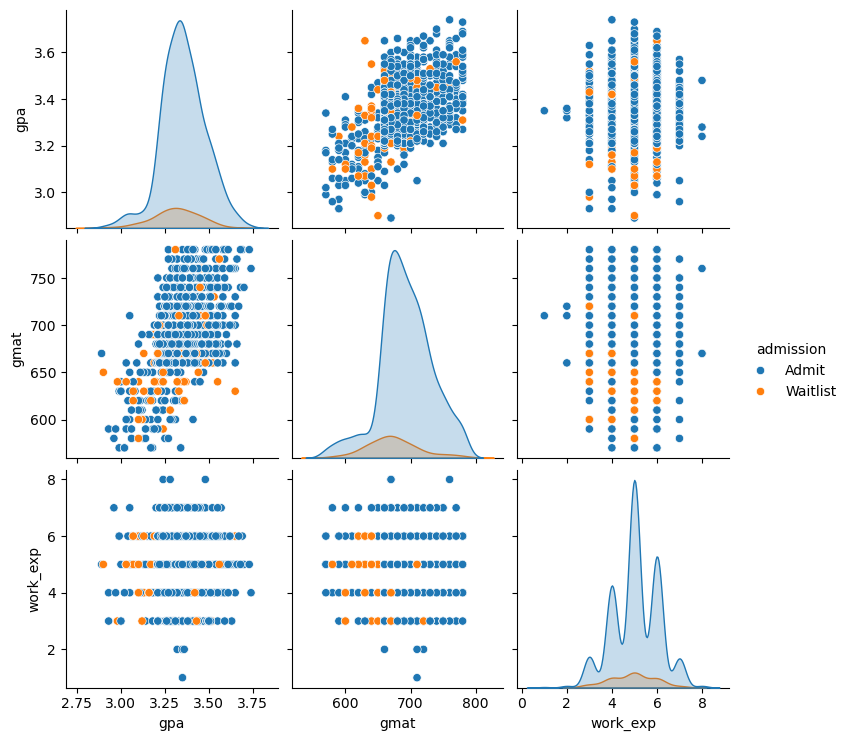

In [27]:
# Bivariate analysis
# Create a subset of the DataFrame that includes only the relevant columns
features = ['gender', 'international', 'major', 'race', 'work_industry', 'gpa', 'gmat', 'work_exp', 'admission']
df_subset = df[features]

# Convert categorical variables to 'category' dtype if they are not already
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry', 'admission']
df_cate_subset = df[categorical_cols]
for col in categorical_cols:
    df_subset[col] = df_subset[col].astype('category')

# Generate pairplot
sns.pairplot(df_subset, hue='admission', diag_kind='kde')

# Show the plot
plt.show()

### As we can observe from the EDA, our dataset is highly imbalanced as we have 900 admits and just 100 waitlists.
### So, we use SMOTE to balance it.

In [31]:
# Separate features (X) and target (y)
X = df.drop(columns=['admission'])  # Drop target and ID column
y = df['admission']  # Target column

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert categorical features to dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y_encoded)

# Decode the target variable back to original labels
y_balanced_decoded = label_encoder.inverse_transform(y_balanced)

# Combine the balanced dataset
balanced_dataset = pd.DataFrame(X_balanced, columns=X_encoded.columns)
balanced_dataset['admission'] = y_balanced_decoded

# Verify the new class distribution
print("Balanced dataset class distribution:")
print(balanced_dataset['admission'].value_counts())

# Save the balanced dataset to a new CSV file if needed
balanced_dataset.to_csv('MBA_balanced', index=False)

Balanced dataset class distribution:
admission
Admit       900
Waitlist    900
Name: count, dtype: int64


In [33]:
balanced_dataset

,international,gpa,race,gmat,work_exp,gender_Male,major_Humanities,major_STEM,work_industry_Consulting,work_industry_Energy,...,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,admission
0,False,3.300000,-1.000000,620,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Admit
1,True,3.300000,4.000000,710,5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,Admit
2,False,2.930000,2.000000,590,3,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,Admit
3,False,3.240000,1.000000,640,6,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,Waitlist
4,False,3.030000,3.000000,600,5,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,Admit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,False,3.325139,1.548613,660,5,True,False,True,False,False,...,False,False,False,False,True,True,False,False,False,Waitlist
1796,True,3.505456,3.345505,731,4,True,True,False,True,False,...,False,False,False,False,False,True,False,False,False,Waitlist
1797,False,3.433585,-0.179238,710,5,True,True,False,True,False,...,True,False,False,False,False,False,False,False,False,Waitlist
1798,False,3.337747,-0.693682,660,3,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,Waitlist


C:\Users\Hareen\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Hareen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hareen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

Removing feature: work_industry_Energy (p-value: 1.000)
Removing feature: gpa (p-value: 0.921)
Removing feature: international (p-value: 0.341)
Removing feature: work_industry_Retail (p-value: 0.072)
Best Features after Backward Elimination: ['race', 'gmat', 'work_exp', 'gender_Male', 'major_Humanities', 'major_STEM', 'work_industry_Consulting', 'work_industry_Financial Services', 'work_industry_Health Care', 'work_industry_Investment Banking', 'work_industry_Investment Management', 'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov', 'work_industry_Other', 'work_industry_PE/VC', 'work_industry_Real Estate', 'work_industry_Technology']
Best Accuracy achieved: 0.8638888888888889
Final Model Accuracy on Test Data: 0.86
ROC-AUC Score: 0.921


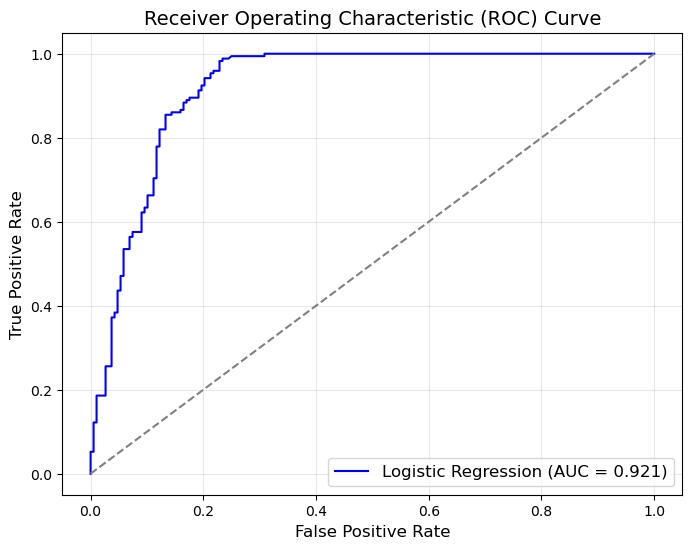

In [57]:
# Preprocessing
# Convert all boolean columns to integers
boolean_columns = balanced_dataset.select_dtypes(include=['bool']).columns
balanced_dataset[boolean_columns] = balanced_dataset[boolean_columns].astype(int)

# Automatically select all columns except 'admission' as features
X = balanced_dataset.drop(columns=['admission'])
y = balanced_dataset['admission']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Automatic Backward Elimination for Logistic Regression
def backward_elimination(X, y):
    features = X.columns.tolist()
    best_accuracy = 0
    best_features = features.copy()
    
    while len(features) > 0:
        X_with_const = sm.add_constant(X[features])  # Adding a constant for the intercept
        model = sm.Logit(y, X_with_const).fit(disp=0)  # Fitting Logistic Regression with statsmodels
        p_values = model.pvalues.iloc[1:]  # Exclude constant's p-value
        max_p_value = p_values.max()
        
        # If max p-value > threshold, remove the feature with the highest p-value
        if max_p_value > 0.05:
            removed_feature = p_values.idxmax()
            features.remove(removed_feature)
            print(f"Removing feature: {removed_feature} (p-value: {max_p_value:.3f})")
        else:
            # Evaluate accuracy with the current feature set
            lr_model = LogisticRegression(max_iter=500)
            lr_model.fit(X_train[features], y_train)
            y_pred = lr_model.predict(X_test[features])
            current_accuracy = accuracy_score(y_test, y_pred)
            
            # If accuracy improves, save the feature set
            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                best_features = features.copy()
            break  # No high p-value left, exit loop
    
    return best_features, best_accuracy

# Perform backward elimination
best_features, best_accuracy = backward_elimination(X_train, y_train)

print("Best Features after Backward Elimination:", best_features)
print("Best Accuracy achieved:", best_accuracy)

# Train and evaluate the final Logistic Regression model
final_model = LogisticRegression(max_iter=500)
final_model.fit(X_train[best_features], y_train)

# Final model predictions
y_pred = final_model.predict(X_test[best_features])
y_probs = final_model.predict_proba(X_test[best_features])[:, 1]  # Probability for the positive class

# Final accuracy
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy on Test Data: {final_accuracy:.2f}")

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (1800).

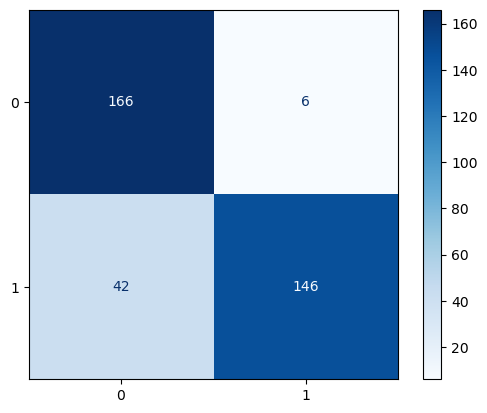

In [43]:
# Load features and target
X = balanced_dataset.drop(columns=['admission','work_industry_Energy','gpa','work_industry_Retail','international'])
y = balanced_dataset['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=balanced_dataset['admission'])
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
